# Aula 4

In [1]:
from func import Modelo_prophet_semanal
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as MAE, mean_absolute_percentage_error as MAPE

In [3]:
dados_sp = pd.read_csv('dados/dados_covid_sp', parse_dates=['datahora'])
dados_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,media_movel_obitos,ano,obitos_3dias_depois,obitos_5dias_depois,obitos_7dias_depois,obitos_10dias_depois,obitos_12dias_depois,obitos_14dias_depois,obitos_16dias_depois,obitos_21dias_depois
0,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,...,NaN,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,...,NaN,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,...,NaN,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,...,NaN,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,...,NaN,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = dados_sp[['datahora', 'casos_novos']]
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2020-02-25,0
1,2020-02-26,0
2,2020-02-27,0
3,2020-02-28,1
4,2020-02-29,0


In [4]:
feriados_sp_2020 = [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21', 
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021 = [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-04-21',
'2021-05-01'
]

#Adicionando as listas ao DataFrame 
feriados_sp_2020 = pd.DataFrame({
  'holiday': 'sp_2020',
  'ds': pd.to_datetime(feriados_sp_2020)
})

feriados_sp_2021 = pd.DataFrame({
  'holiday': 'sp_2021',
  'ds': pd.to_datetime(feriados_sp_2021)
})

feriados = pd.concat((feriados_sp_2020, feriados_sp_2021)) #união das informações

### Primeiro modelo: utilizando o modo aditivo na sazonalidade e sem levar em conta os feriados

In [15]:
modelo_ad = Modelo_prophet_semanal(df, changepoint_prior_scale=10)

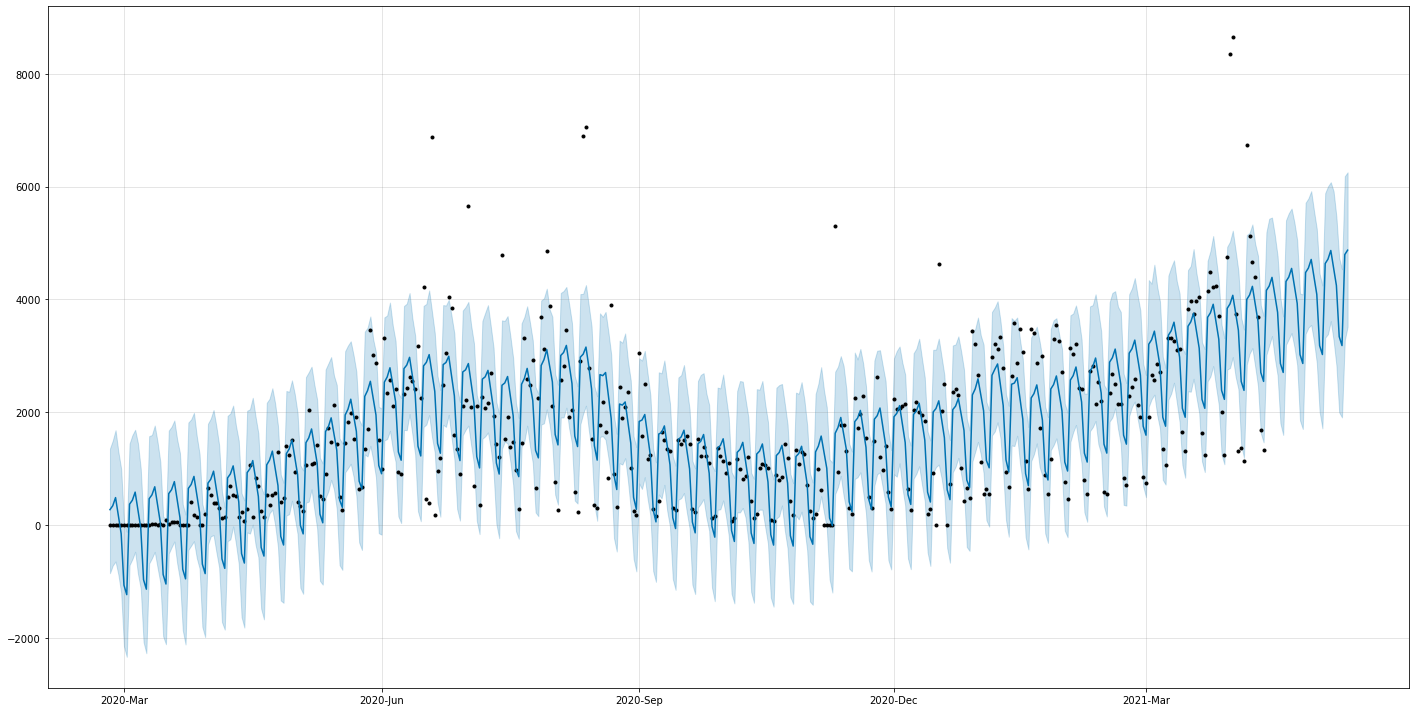

In [6]:
modelo_ad.plota()

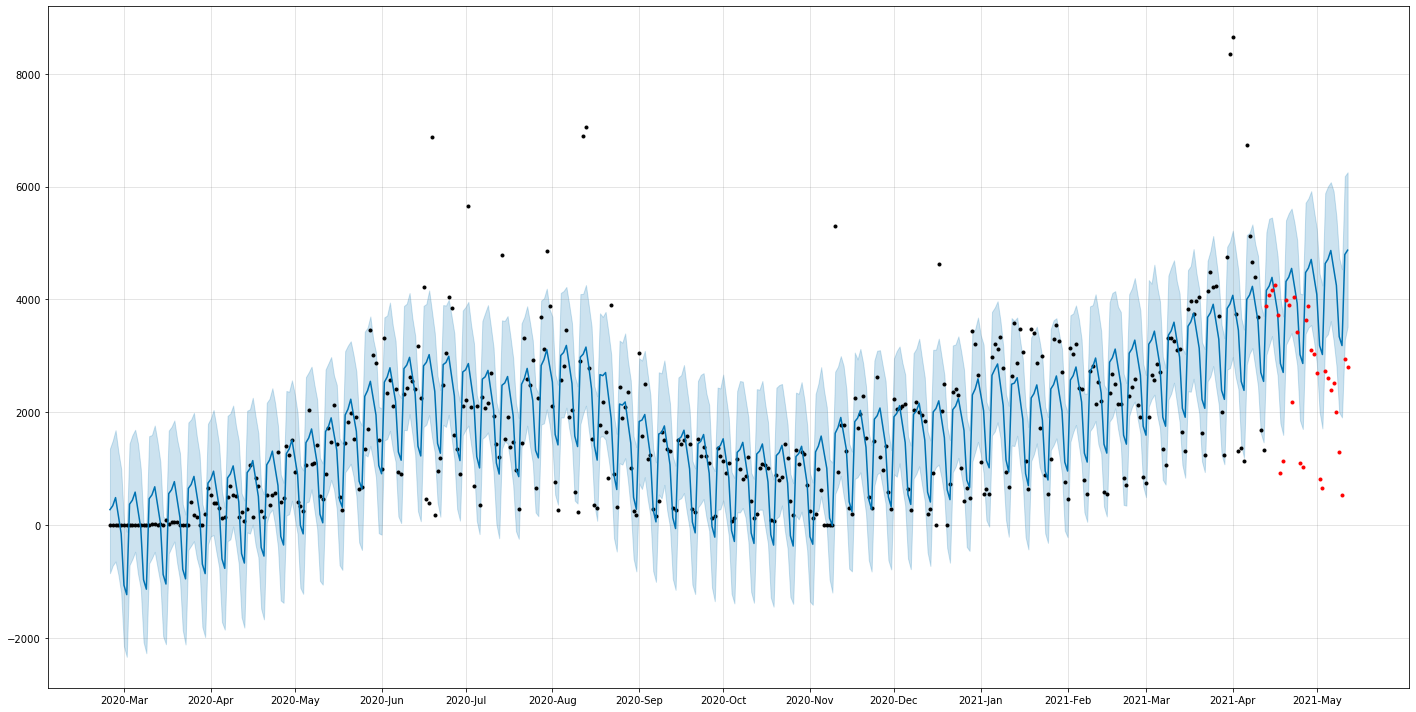

In [7]:
modelo_ad.plota(kwargs_testeplot={'color':'red','marker':'.'}, month_freq=1)
#plt.plot(modelo_ad.teste['ds'], modelo_ad.teste['y'], linestyle='--', alpha=0.3, color='red')
#plt.plot(modelo_ad.treino['ds'], modelo_ad.treino['y'], linestyle='--', alpha=0.3, color='black')
#plt.show()

### Segundo modelo: utilizando o modo aditivo na sazonalidade e levando em conta os feriados

In [8]:
modelo_ad_feriado = Modelo_prophet_semanal(df, changepoint_prior_scale=10, holidays=feriados)

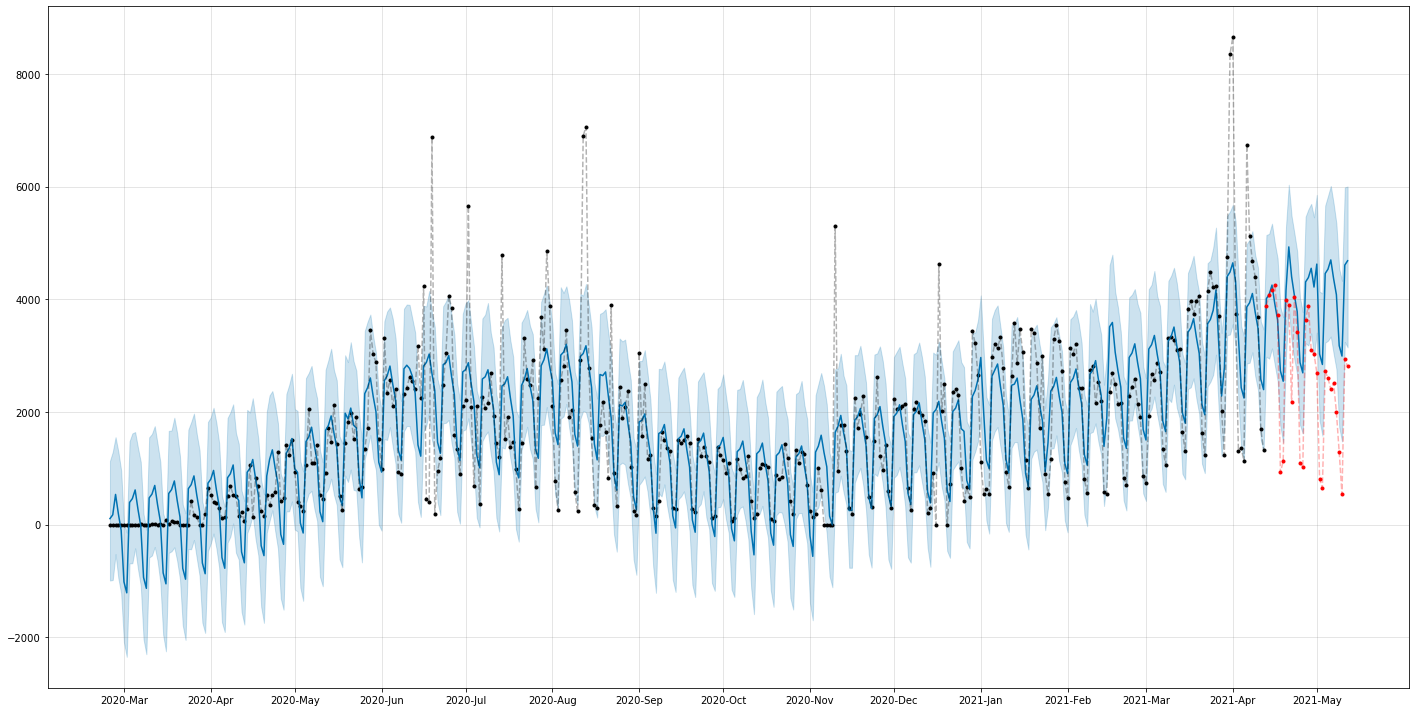

In [9]:
modelo_ad_feriado.plota(kwargs_testeplot={'color':'red','marker':'.'}, month_freq=1)
plt.plot(modelo_ad_feriado.teste['ds'], modelo_ad_feriado.teste['y'], linestyle='--', alpha=0.3, color='red')
plt.plot(modelo_ad_feriado.treino['ds'], modelo_ad_feriado.treino['y'], linestyle='--', alpha=0.3, color='black')
plt.show()

### Terceiro modelo: utilizando o modo multiplicativo na sazonalidade e sem levar em conta os feriados

In [10]:
modelo_mt = Modelo_prophet_semanal(df, changepoint_prior_scale=10, seasonality_mode='multiplicative')

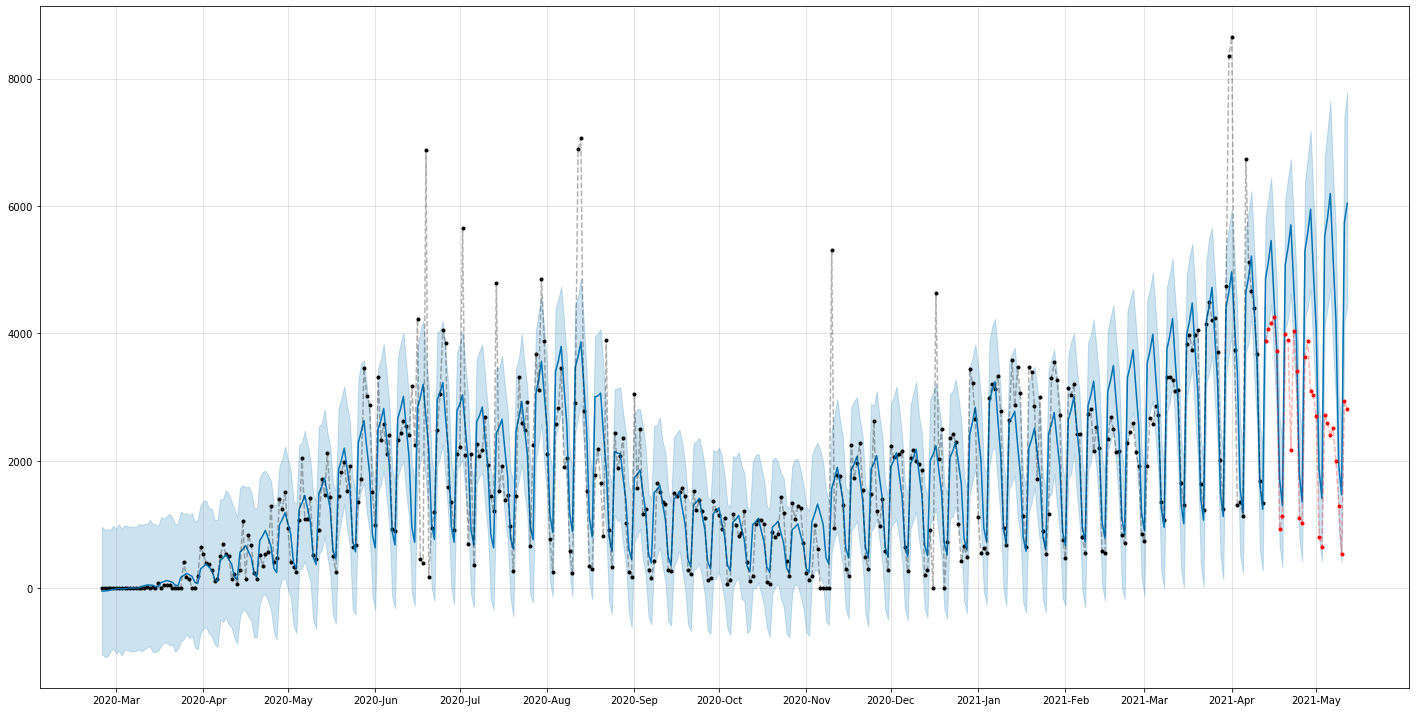

In [11]:
modelo_mt.plota(kwargs_testeplot={'color':'red','marker':'.'}, month_freq=1)
plt.plot(modelo_mt.teste['ds'], modelo_mt.teste['y'], linestyle='--', alpha=0.3, color='red')
plt.plot(modelo_mt.treino['ds'], modelo_mt.treino['y'], linestyle='--', alpha=0.3, color='black')
plt.show()

### Quarto modelo: utilizando o modo multiplicativo na sazonalidade e levando em conta os feriados

In [12]:
modelo_mt_feriado = Modelo_prophet_semanal(df, changepoint_prior_scale=10, seasonality_mode='multiplicative', holidays=feriados)

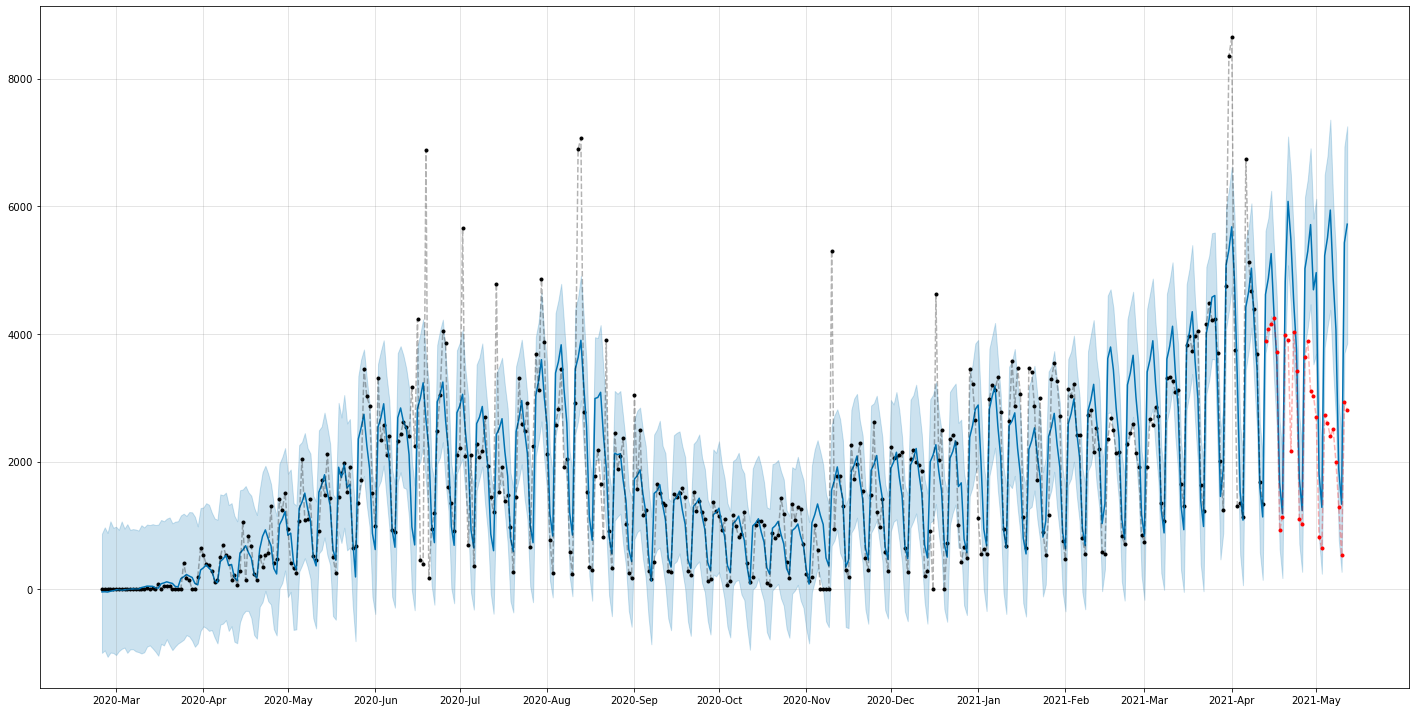

In [13]:
modelo_mt_feriado.plota(kwargs_testeplot={'color':'red','marker':'.'}, month_freq=1)
plt.plot(modelo_mt_feriado.teste['ds'], modelo_mt_feriado.teste['y'], linestyle='--', alpha=0.3, color='red')
plt.plot(modelo_mt_feriado.treino['ds'], modelo_mt_feriado.treino['y'], linestyle='--', alpha=0.3, color='black')
plt.show()

# Desafio Extra: Utilizar outras métricas do Scikitlearn e comparar os resultados.

In [14]:
metricas = pd.DataFrame(columns=['seasonality_mode', 'changepoint_prior_scale', 'feriados', 'MAE_treino', 'MAPE_treino', 'MAE_teste', 'MAPE_teste'])

In [15]:
modelos = [modelo_ad, modelo_ad_feriado, modelo_mt, modelo_mt_feriado]
for modelo in modelos:
    
    if modelo.modelo.holidays is not None:
        feriado = True
    else:
        feriado = False
    
    metricas = pd.concat([metricas, pd.DataFrame({'seasonality_mode':[modelo.modelo.seasonality_mode], 'changepoint_prior_scale':[modelo.modelo.changepoint_prior_scale], 'feriados':[feriado], 
                                             'MAE_treino':[MAE(modelo.treino.y, modelo.previsao[:len(modelo.treino)]['yhat'])], 
                                             'MAPE_treino':[MAPE(modelo.treino.y, modelo.previsao[:len(modelo.treino)]['yhat'])], 'MAE_teste':[MAE(modelo.teste.y, modelo.previsao[len(modelo.treino):]['yhat'])],
                                             'MAPE_teste':[MAPE(modelo.teste.y, modelo.previsao[len(modelo.treino):]['yhat'])]})])

In [16]:
metricas

,seasonality_mode,changepoint_prior_scale,feriados,MAE_treino,MAPE_treino,MAE_teste,MAPE_teste
0,additive,10.0,False,582.739822,1.646977e+17,1402.704012,0.985162
0,additive,10.0,True,581.804726,1.603604e+17,1301.914713,0.913765
0,multiplicative,10.0,False,476.842713,7.311741e+16,1547.865292,0.705860
0,multiplicative,10.0,True,476.944776,7.329537e+16,1424.023716,0.643892


### Analisando as métricas do modelo podemos observar a diferença que tem os modelos aditivos e multiplicativos, além disso é possível ver também a diferença de levar em conta os feriados também 

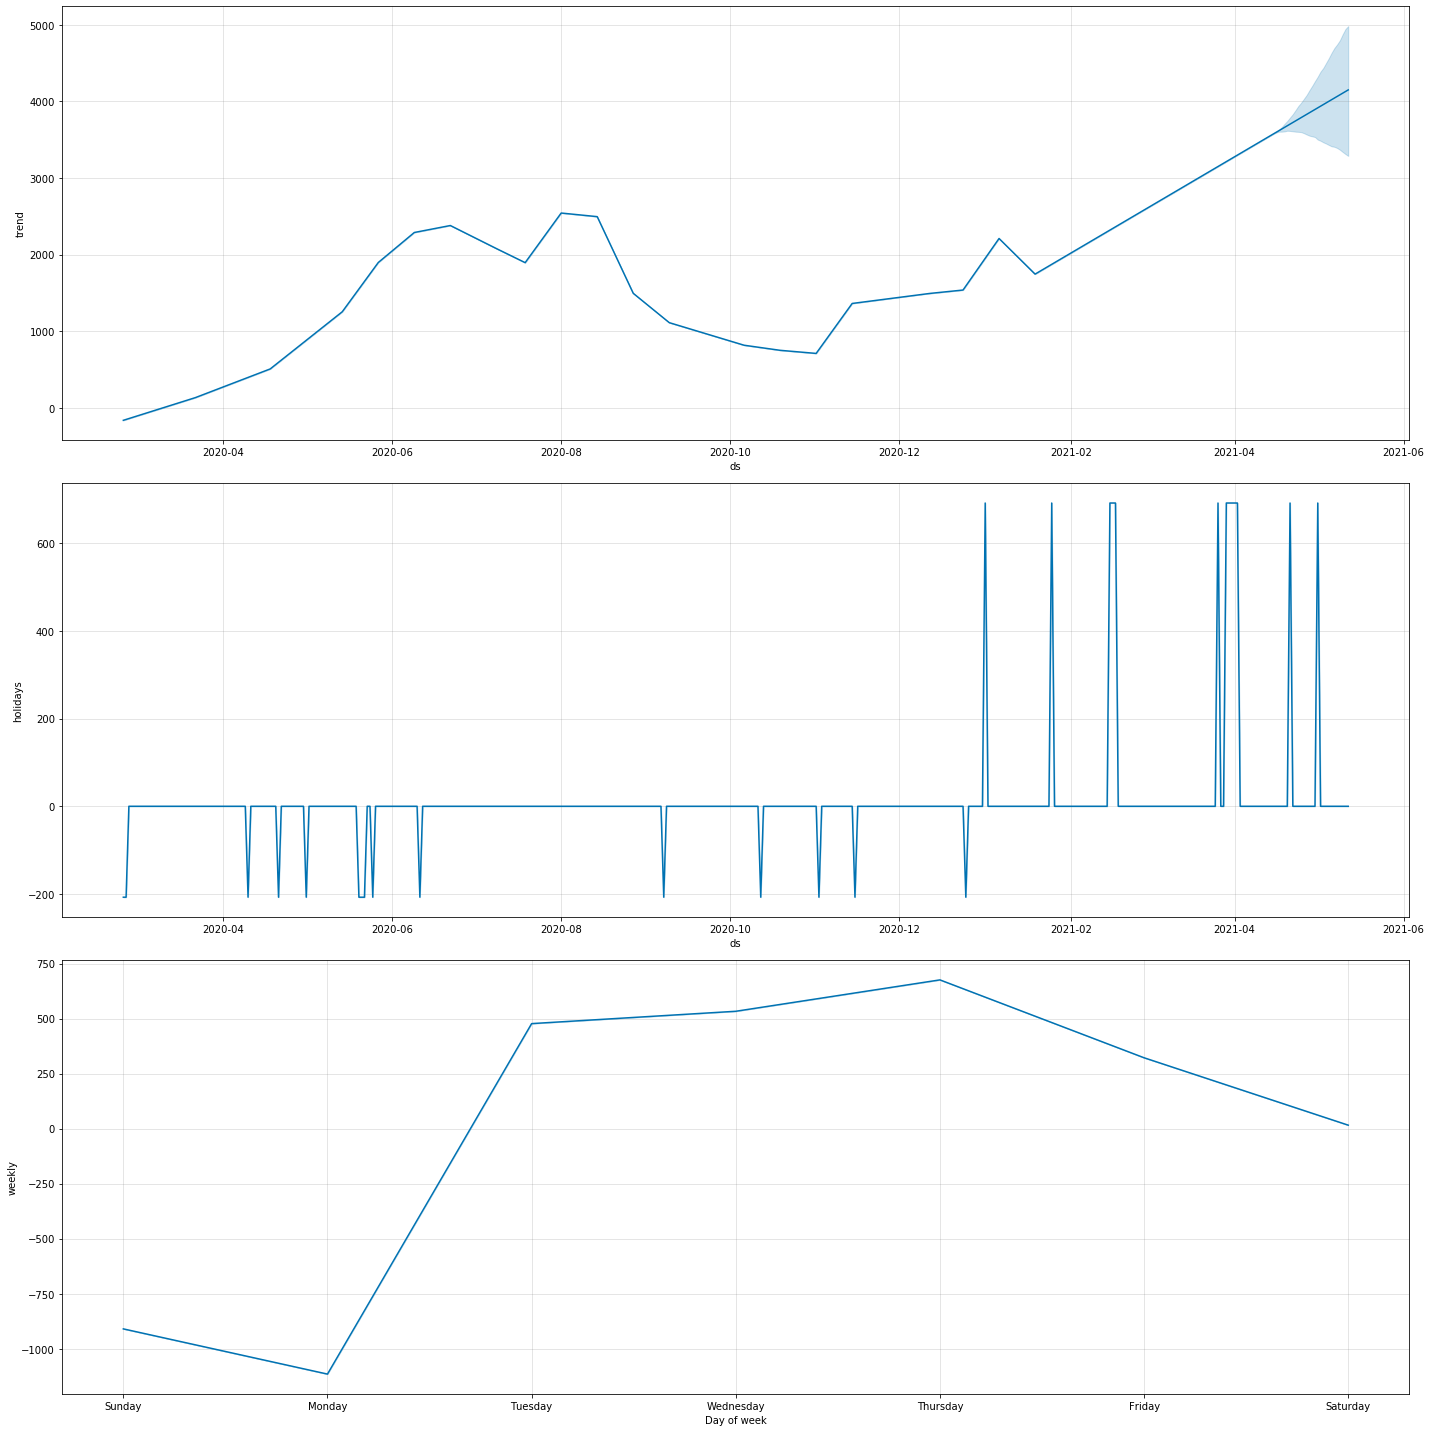

In [17]:
modelo_ad_feriado.modelo.plot_components(modelo_ad_feriado.previsao, figsize=(20,20));

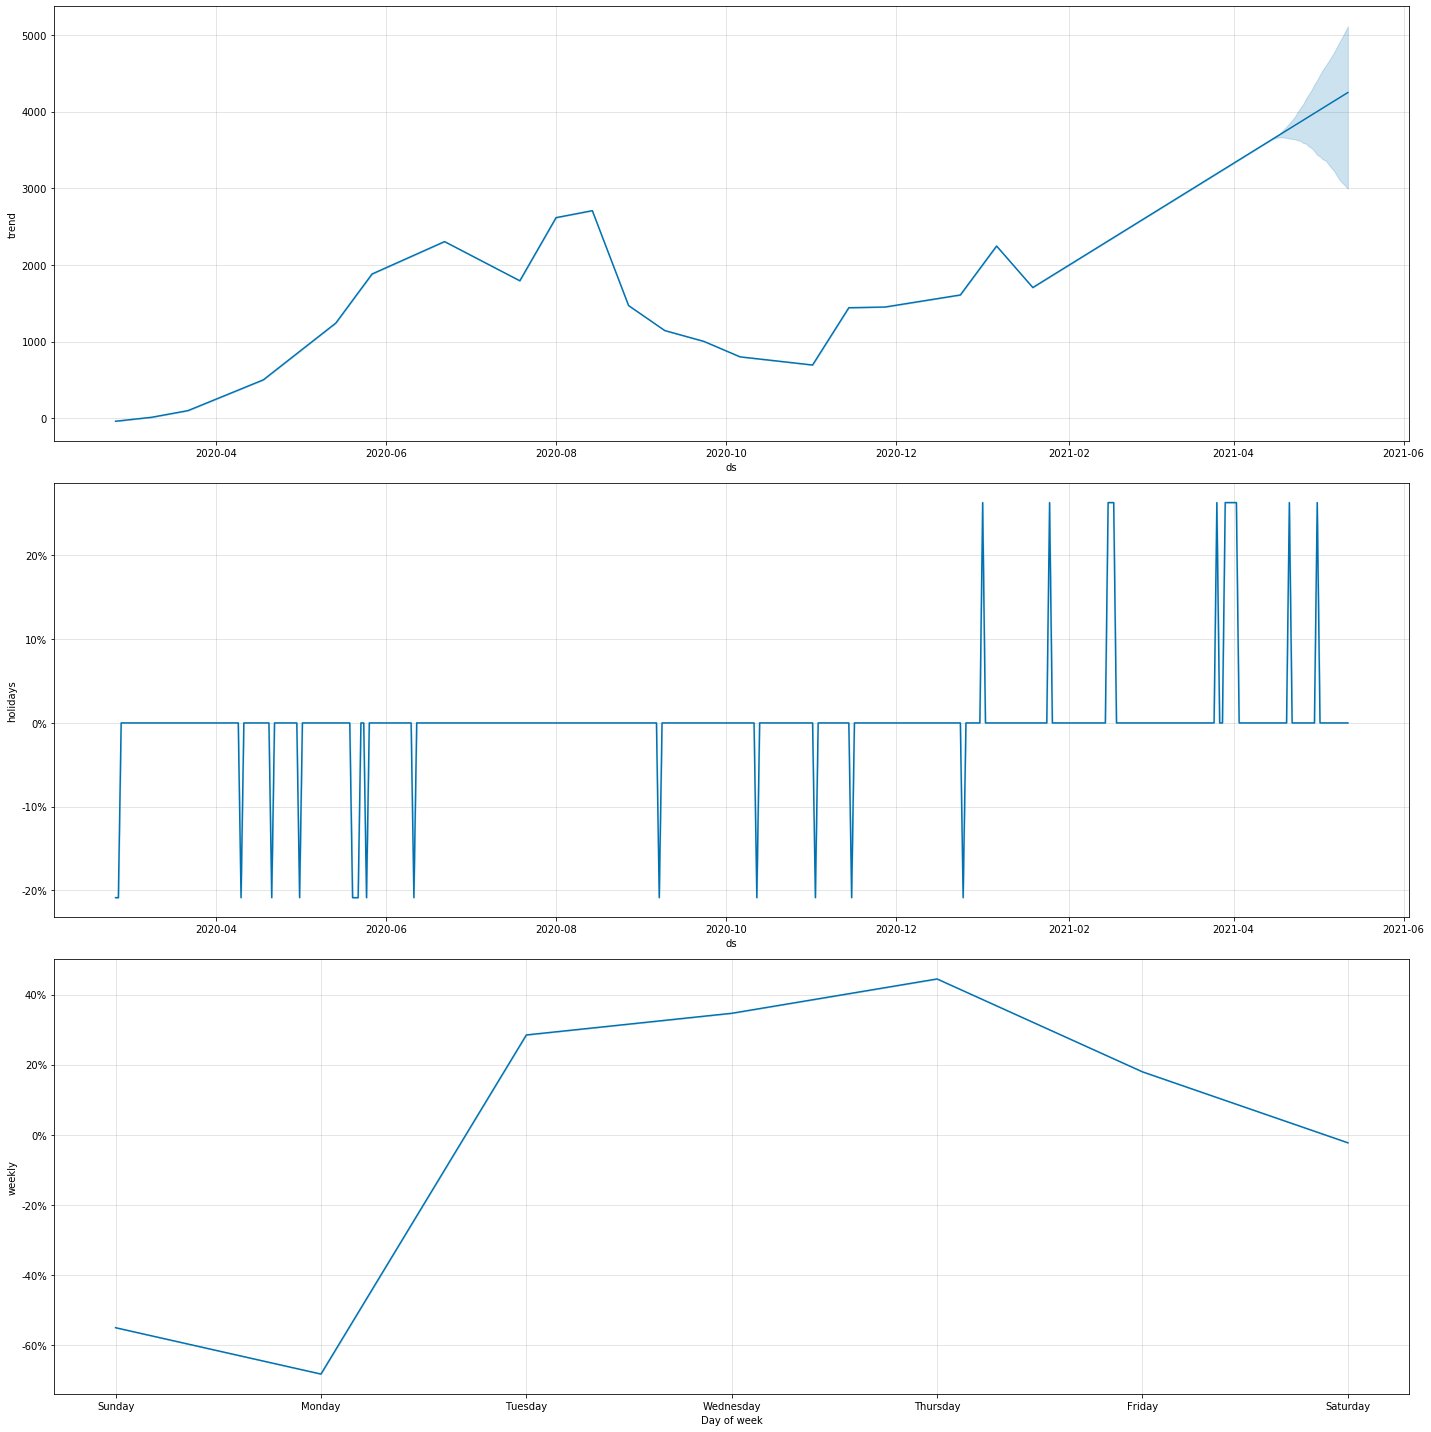

In [18]:
modelo_mt_feriado.modelo.plot_components(modelo_mt_feriado.previsao, figsize=(20,20));